# we will be dealing with the Heart disease dataset and will analyze, predict the result whether the patient has heart disease or normal, i.e. Heart disease prediction using Machine Learning. This prediction will make it faster and more efficient in healthcare sectors which will be a time-consuming process.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
import pickle

In [3]:
df=pd.read_csv(r"C:\Users\sajal\Downloads\HeartDisease - HeartDisease.csv")
df.head(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

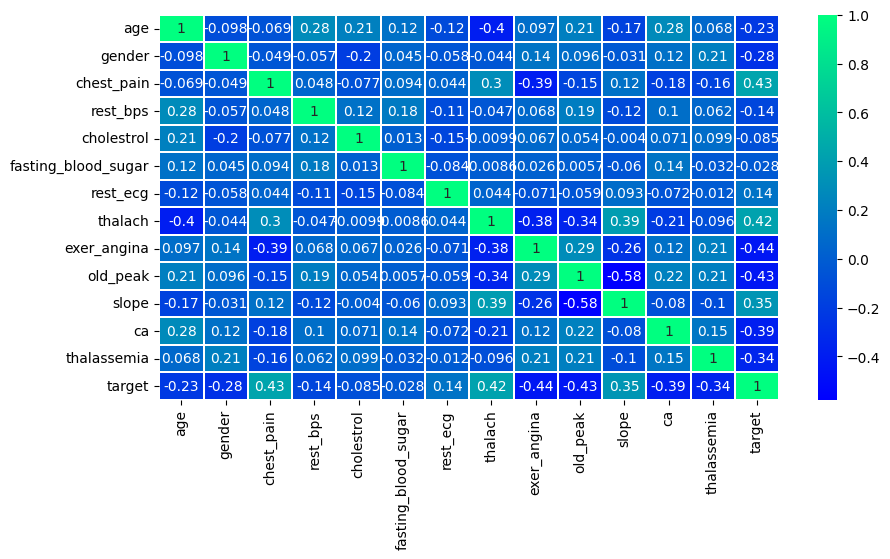

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

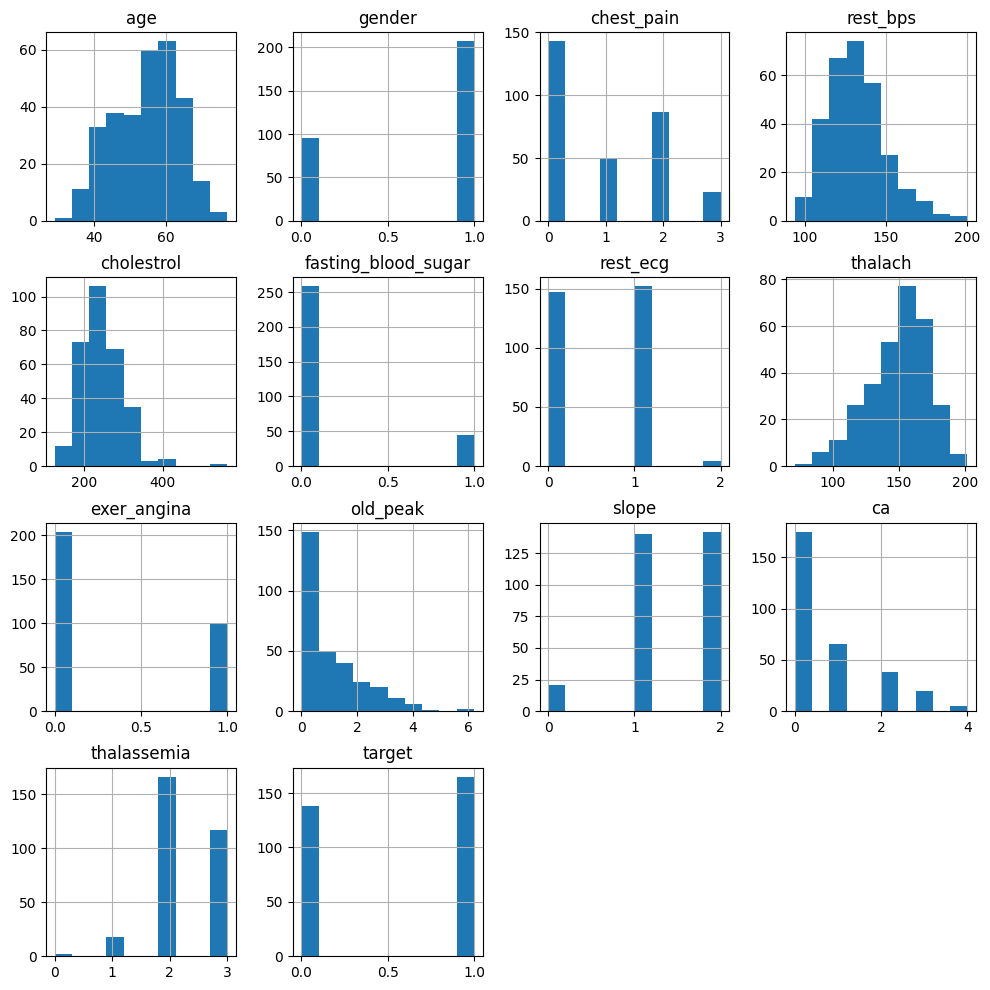

In [8]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

<Axes: title={'center': 'HEART DISEASE DISTRIBUTION'}, ylabel='count'>

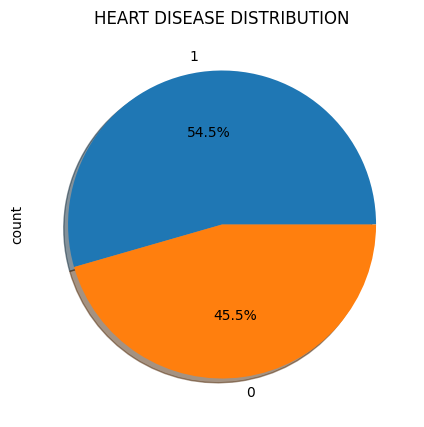

In [12]:
plt.title('HEART DISEASE DISTRIBUTION')
df['target'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(5,5),shadow=True)

C:\Users\sajal\AppData\Local\Temp\ipykernel_24588\3379090101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df,palette='rainbow')


<Axes: title={'center': 'Age Vs Heart Disease'}, xlabel='target', ylabel='age'>

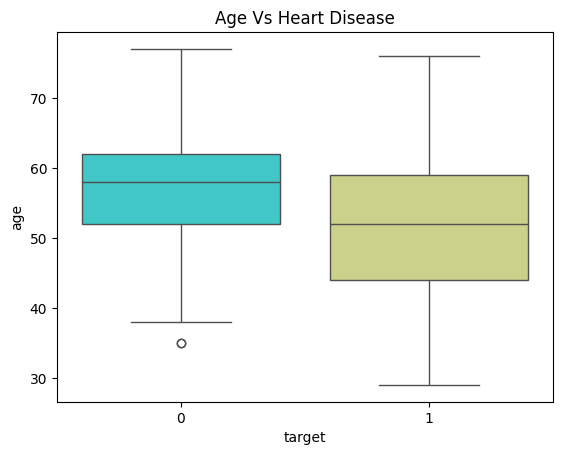

In [13]:
plt.title('Age Vs Heart Disease')
sns.boxplot(x='target', y='age', data=df,palette='rainbow')

# Traning and testing data

In [19]:
x = df.drop(['target'],axis='columns')
x.head(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [17]:
y = df.target
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# MultinominalNB

In [21]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)
nb=model_1.score(X_test, y_test)
nb


0.7049180327868853

# LogisticRegression

In [22]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
lr=model_2.score(X_test, y_test)
lr

c:\Users\sajal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7704918032786885

# RandomForestClassifier

In [23]:
model_3 = RandomForestClassifier(n_estimators=30)
model_3.fit(X_train, y_train)
rf=model_3.score(X_test, y_test)
rf

0.8360655737704918

# DecisionTreeClassifier

In [24]:
model_4 = tree.DecisionTreeClassifier(criterion='entropy')
model_4.fit(X_train, y_train)
dt=model_4.score(X_train, y_train)
dt

1.0

# SVC

In [25]:
model_5 = SVC()
model_5.fit(X_train, y_train)
sv=model_5.score(X_test, y_test)
sv

0.5901639344262295

# Conclusion
# Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays. From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the Decision Tree Algorithm, thereby making accurate heart disease prediction using machine learning. I hope that you are all excited about the blog. Let us know your thoughts in the comments!

